In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

!cd /content/drive/MyDrive

Mounted at /content/drive/


### EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.shape

(768, 9)

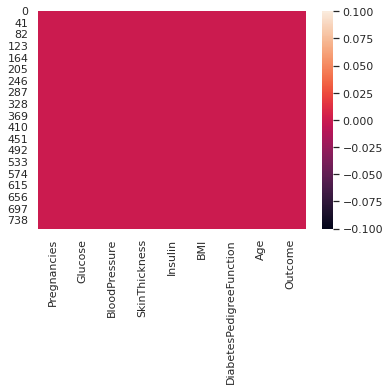

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
%%capture
!pip3 install pandas_profiling --upgrade

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

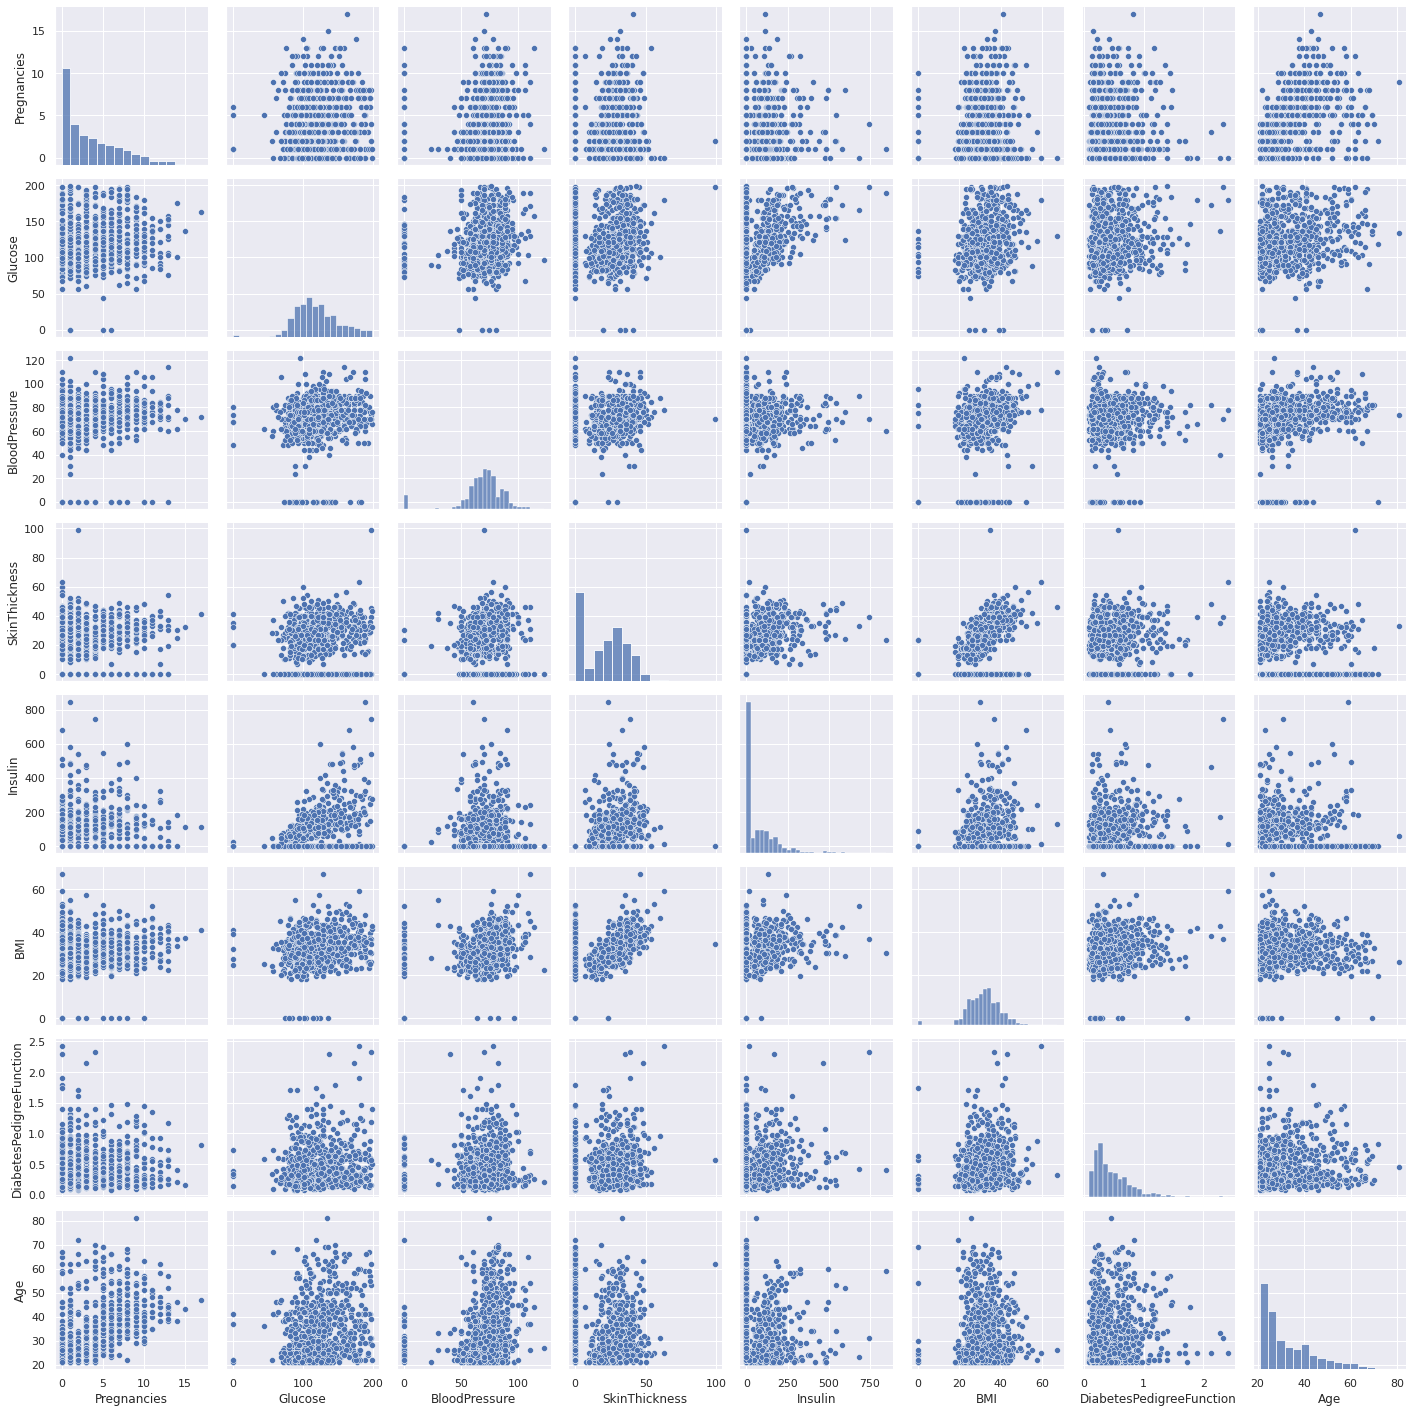

In [ ]:
sns.pairplot(df.drop('Outcome', axis=1))

We use the following classifiers individually and the combination of these classifiers: Logistic Regression Classifier, DT Classifier, KNN Classifier, SVM Classifier, Naive Bayes Classifier, Random Forest Classifier, Adaboost Classifier and then Voted Classifier variations.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y = df['Outcome']
X = df.drop('Outcome', axis=1)

scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                             'Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Logistic Regresion Classifier

Model: LogisticRegression(max_iter=100000.0, solver='liblinear')
Confusion Matrix


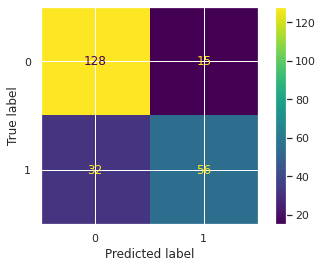

Accuracy: 0.7965367965367965
Precision: 0.7887323943661971
Recall: 0.6363636363636364
F1 Score: 0.7044025157232705


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', max_iter=1e5)
print('Model:', logreg)

logreg.fit(X_train,y_train)

y_pred_logreg = logreg.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logreg)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Precision:', precision_score(y_test, y_pred_logreg))
print('Recall:', recall_score(y_test, y_pred_logreg))
print('F1 Score:', f1_score(y_test, y_pred_logreg))

### DT Classifier

Model: DecisionTreeClassifier()
Confusion Matrix


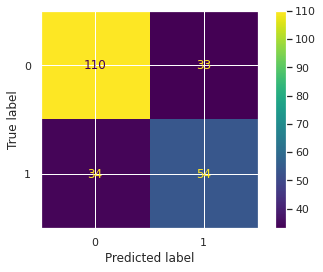

Accuracy: 0.70995670995671
Precision: 0.6206896551724138
Recall: 0.6136363636363636
F1 Score: 0.6171428571428572


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier()
print('Model:', dectree)

dectree.fit(X_train,y_train)

y_pred_dectree = dectree.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dectree)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_dectree))
print('Precision:', precision_score(y_test, y_pred_dectree))
print('Recall:', recall_score(y_test, y_pred_dectree))
print('F1 Score:', f1_score(y_test, y_pred_dectree))

## KNN Classifier

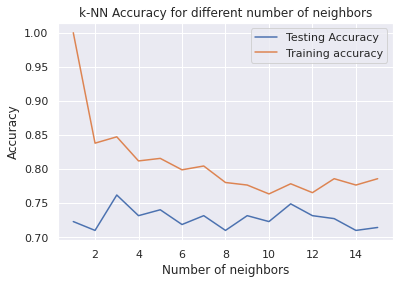

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_s = range(1, 16)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_s):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test) )

plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(k_s, test_accuracy, label='Testing Accuracy')
plt.plot(k_s, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Model: KNeighborsClassifier(n_neighbors=11)
Confusion Matrix


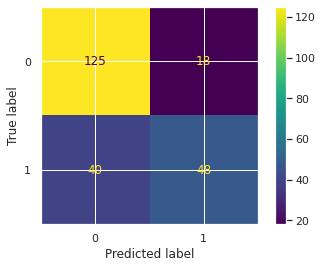

Accuracy: 0.7489177489177489
Precision: 0.7272727272727273
Recall: 0.5454545454545454
F1 Score: 0.6233766233766234


In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
print('Model:', knn)

knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))
print('F1 Score:', f1_score(y_test, y_pred_knn))

## SVM

Model: SVC(kernel='linear', probability=True)
Confusion Matrix


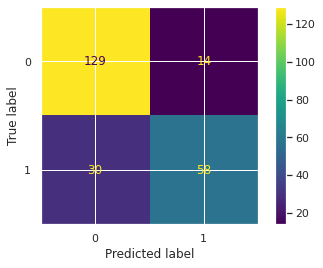

Accuracy: 0.8095238095238095
Precision: 0.8055555555555556
Recall: 0.6590909090909091
F1 Score: 0.7250000000000001


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
print('Model:', svm)

svm.fit(X_train,y_train)

y_pred_svm = svm.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('F1 Score:', f1_score(y_test, y_pred_svm))

## Naive Bayes

Model: GaussianNB()
Confusion Matrix


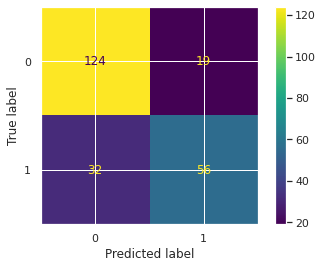

Accuracy: 0.7792207792207793
Precision: 0.7466666666666667
Recall: 0.6363636363636364
F1 Score: 0.6871165644171779


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
print('Model:', nb)

nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Precision:', precision_score(y_test, y_pred_nb))
print('Recall:', recall_score(y_test, y_pred_nb))
print('F1 Score:', f1_score(y_test, y_pred_nb))

Model: RandomForestClassifier(max_samples=200, n_estimators=20, random_state=0)
Confusion Matrix


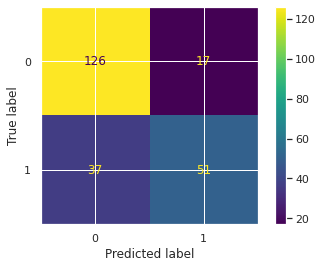

Accuracy: 0.7662337662337663
Precision: 0.75
Recall: 0.5795454545454546
F1 Score: 0.6538461538461539


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0,n_estimators=20,max_samples=200)
print('Model:', rf)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))

## Ensemble Classifier: AdaBoost

Model: AdaBoostClassifier(n_estimators=100)
Confusion Matrix


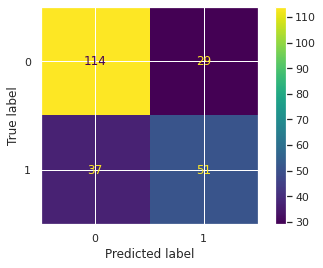

Accuracy: 0.7142857142857143
Precision: 0.6375
Recall: 0.5795454545454546
F1 Score: 0.6071428571428571


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100)
print('Model:', abc)

abc.fit(X_train, y_train)

y_pred_abc = abc.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_abc)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_abc))
print('Precision:', precision_score(y_test, y_pred_abc))
print('Recall:', recall_score(y_test, y_pred_abc))
print('F1 Score:', f1_score(y_test, y_pred_abc))

## Voting Classifier (Unweighted)

Model: VotingClassifier(estimators=[('logreg',
                              LogisticRegression(max_iter=100000.0,
                                                 solver='liblinear')),
                             ('dectree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('abc', AdaBoostClassifier(n_estimators=100))],
                 voting='soft')
Confusion Matrix


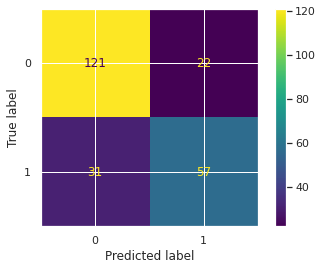

Accuracy: 0.7705627705627706
Precision: 0.7215189873417721
Recall: 0.6477272727272727
F1 Score: 0.6826347305389221


In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('logreg',logreg),('dectree',dectree),('knn',knn),('svm',svm),('nb',nb)], voting='soft')
print('Model:', vc)

vc.fit(X_train, y_train)

y_pred_vc = vc.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_vc)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_vc))
print('Precision:', precision_score(y_test, y_pred_vc))
print('Recall:', recall_score(y_test, y_pred_vc))
print('F1 Score:', f1_score(y_test, y_pred_vc))a

## Voting Classifier (Weighted)

Model: VotingClassifier(estimators=[('logreg',
                              LogisticRegression(max_iter=100000.0,
                                                 solver='liblinear')),
                             ('dectree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('abc', AdaBoostClassifier(n_estimators=100))],
                 voting='soft', weights=[3, 2, 3, 1, 1])
Confusion Matrix


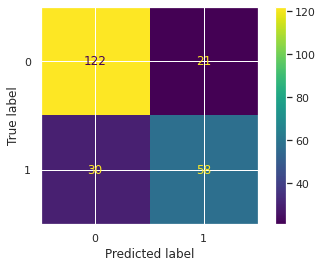

Accuracy: 0.7792207792207793
Precision: 0.7341772151898734
Recall: 0.6590909090909091
F1 Score: 0.6946107784431138


In [ ]:
from sklearn.ensemble import VotingClassifier

vcw = VotingClassifier(estimators=[('logreg',logreg),('dectree',dectree),('knn',knn),('svm',svm),('nb',nb)], voting='soft', weights=[3,2,3,1,1])
print('Model:', vcw)

vcw.fit(X_train, y_train)

y_pred_vcw = vcw.predict(X_test)

print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_vcw)).plot()
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred_vcw))
print('Precision:', precision_score(y_test, y_pred_vcw))
print('Recall:', recall_score(y_test, y_pred_vcw))
print('F1 Score:', f1_score(y_test, y_pred_vcw))

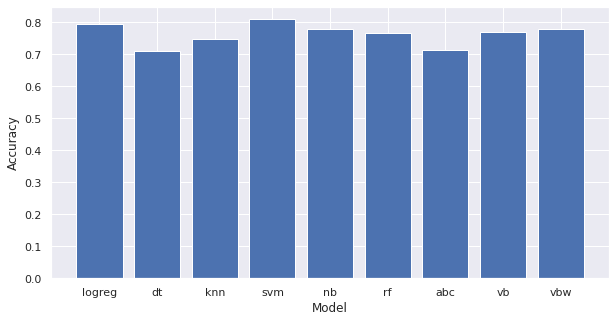

In [ ]:
data = {
    'logreg': accuracy_score(y_test, y_pred_logreg),
    'dt': accuracy_score(y_test, y_pred_dectree),
    'knn': accuracy_score(y_test, y_pred_knn),
    'svm': accuracy_score(y_test, y_pred_svm),
    'nb': accuracy_score(y_test, y_pred_nb),
    'rf': accuracy_score(y_test, y_pred_rf),
    'abc': accuracy_score(y_test, y_pred_abc),
    'vb': accuracy_score(y_test, y_pred_vc),
    'vbw': accuracy_score(y_test, y_pred_vcw)
}

fig = plt.figure(figsize = (10, 5))

plt.bar(data.keys(), data.values())

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

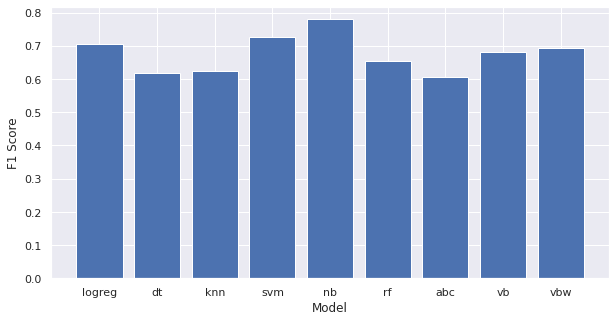

In [ ]:
data = {
    'logreg': f1_score(y_test, y_pred_logreg),
    'dt': f1_score(y_test, y_pred_dectree),
    'knn': f1_score(y_test, y_pred_knn),
    'svm': f1_score(y_test, y_pred_svm),
    'nb': accuracy_score(y_test, y_pred_nb),
    'rf': f1_score(y_test, y_pred_rf),
    'abc': f1_score(y_test, y_pred_abc),
    'vb': f1_score(y_test, y_pred_vc),
    'vbw': f1_score(y_test, y_pred_vcw)
}

fig = plt.figure(figsize = (10, 5))

plt.bar(data.keys(), data.values())

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()